In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
np.set_printoptions(precision=3)
import sys
sys.path.append('../../zdrojaky')
from tsplot import tsplot

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))

# Modelování časové řady COVID-19 pomocí SARIMA modelu

*Zdroj dat: https://opendata.mzcr.cz/cs_CZ/dataset/covid-19-prehled-osob-s-nove-prokazanou-nakazou*

Uvažujme opět datovou sadu poskytovanou MZ ČR s následujícím popisem:

```Datová sada poskytuje agregovaná data o nově prokázaných nákazách SARS-CoV-2. Každý řádek přehledu uvádí počty osob z pohledu nově potvrzených případů, opakovaně potvrzených případů (reinfekcí), potvrzených případů ve vztahu k nedokončenému očkování, dokončenému očkování a prodělané nákaze SARS-CoV-2, hospitalizaci a léčbě na jednotce intenzivní péče (JIP).```

In [2]:
fn = 'nakazeni-reinfekce.csv'
data = pd.read_csv(fn, index_col=1, parse_dates=True, infer_datetime_format=True)
data.head()

,id,nove_pripady,nove_reinfekce,pripady_neockovani_neprodelali,pripady_neockovani_prodelali,pripady_ockovani_neprodelali,pripady_ockovani_prodelali,hospitalizace_bez_reinfekce,hospitalizace_vcetne_reinfekce,hospitalizace_pouze_reinfekce,...,hospitalizace_ockovani_prodelali,jip_bez_reinfekce,jip_vcetne_reinfekce,jip_pouze_reinfekce,nove_jip,nove_jip_komplet,jip_neockovani_neprodelali,jip_neockovani_prodelali,jip_ockovani_neprodelali,jip_ockovani_prodelali
datum,,,,,,,,,,,,,,,,,,,,,
2020-03-01,03277fdd-a261-4aa4-907b-c525f9a1d086,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02,3a775543-d1f1-49d5-9223-dace53e808ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,d34cfea2-a8d3-4d75-9c7b-bc969d1867e8,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,702e4167-072c-45fc-8fe7-909118103d62,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,a3e682c3-c144-42ab-82b4-7325b4d1f4a6,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Zaměříme se na jeden ze sloupečků, v zásadě je jedno, jaký. Mají data nějaké význačné vlastnosti?

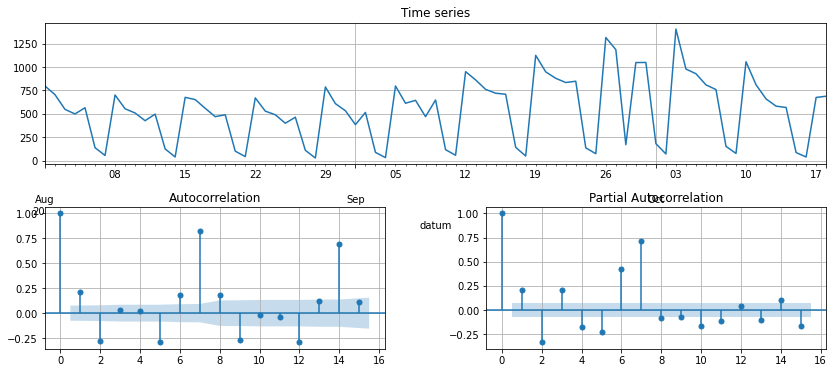

In [3]:
df_analysis = data['pripady_ockovani_prodelali'].last('3M')
df_analysis = df_analysis.asfreq('D')

tsplot(df_analysis, lags=15)

Zřejmě bychom mohli zkusit zapracovat na trendu v sezónních datech...

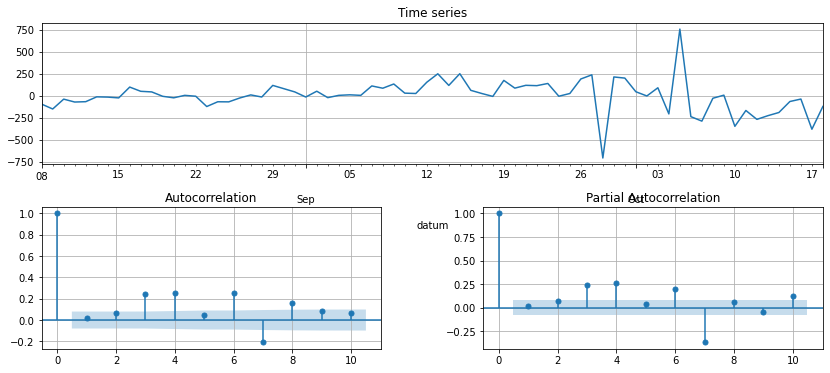

In [4]:
df_analysis_d7 = df_analysis.diff(7).dropna()
tsplot(df_analysis_d7, lags=10)

Podobně se

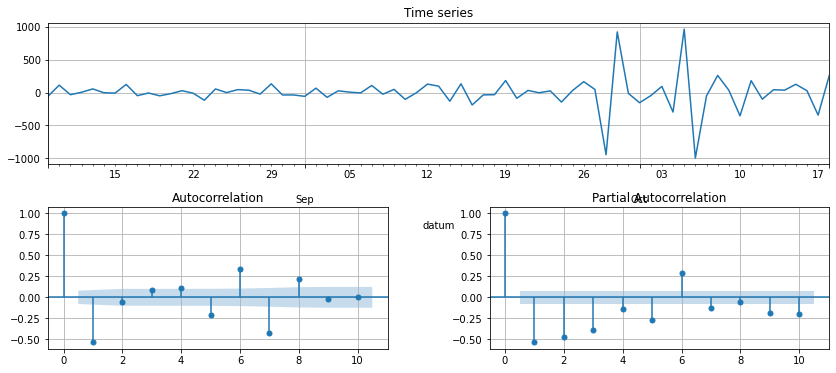

In [5]:
df_analysis_d7_d1 = df_analysis_d7.diff().dropna()
tsplot(df_analysis_d7_d1, lags=10)

Fajn. A co dále? :)